### Inteligencia Artificial 2025 - Lab 2

In [25]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import geom
from scipy.stats import ks_2samp
from scipy.stats import probplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import StandardScaler
import analisis
from PIL import Image

# Ejercicio 1: Simulación de lanzamientos de una moneda
## Parte a: Estimación de la densidad del número de lanzamientos necesarios para obtener el primer éxito

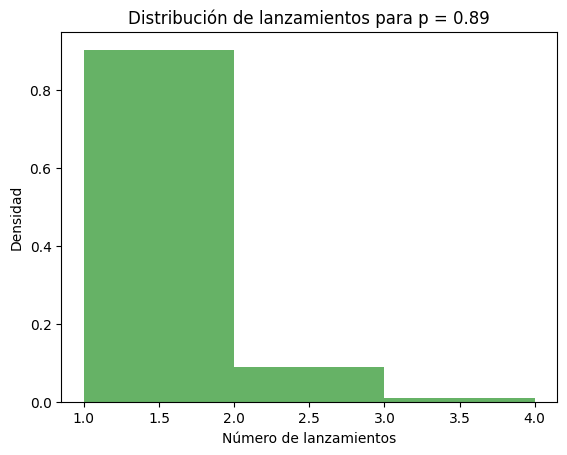

In [34]:
def simular_lanzamientos(p, N):
    lanzamientos = []
    
    for _ in range(N):
        intentos = 0
        while np.random.rand() > p:
            intentos += 1
        lanzamientos.append(intentos + 1)  # Agregamos 1 porque el primer éxito ocurre en el intento n+1
    
    return lanzamientos

# Parámetros
p = float(input("Introduce la probabilidad de éxito p (0 < p < 1): "))
N = 1000

# Simulamos lanzamientos
lanzamientos = simular_lanzamientos(p, N)

# Visualizamos la distribución
plt.hist(lanzamientos, bins=range(1, max(lanzamientos) + 1), density=True, alpha=0.6, color='g')
plt.title(f"Distribución de lanzamientos para p = {p}")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Densidad")
plt.show()


## Parte b: Visualización de la función de densidad para diferentes valores de p

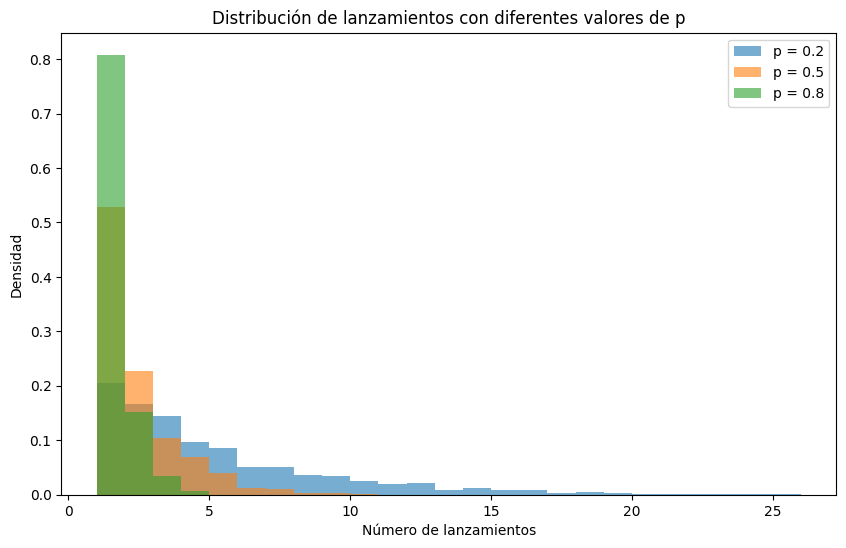

In [35]:
# Valores de p
valores_p = [0.2, 0.5, 0.8]

# Simulamos y mostramos la distribución para cada valor de p
plt.figure(figsize=(10, 6))

for p in valores_p:
    lanzamientos = simular_lanzamientos(p, N)
    plt.hist(lanzamientos, bins=range(1, max(lanzamientos) + 1), density=True, alpha=0.6, label=f"p = {p}")

plt.title("Distribución de lanzamientos con diferentes valores de p")
plt.xlabel("Número de lanzamientos")
plt.ylabel("Densidad")
plt.legend()
plt.show()


# Ejercicio 2: Comparar dos muestras

Comparación con Geom(p):


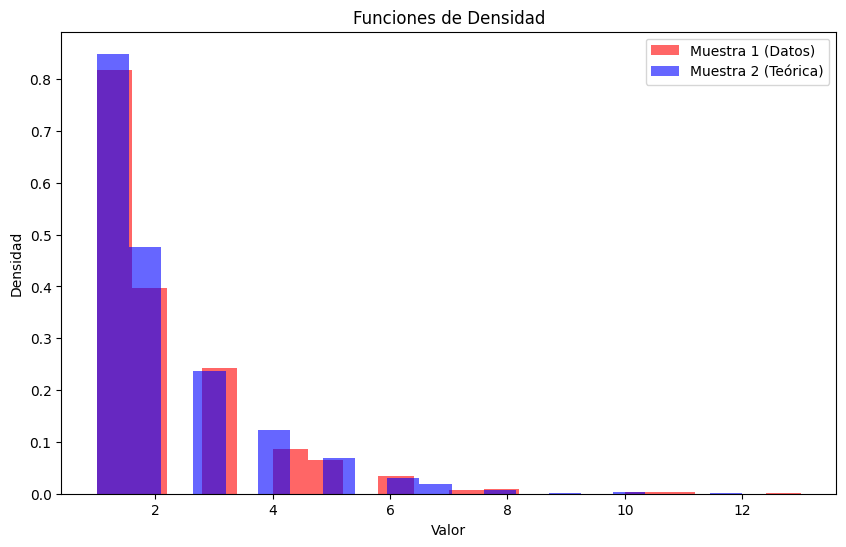

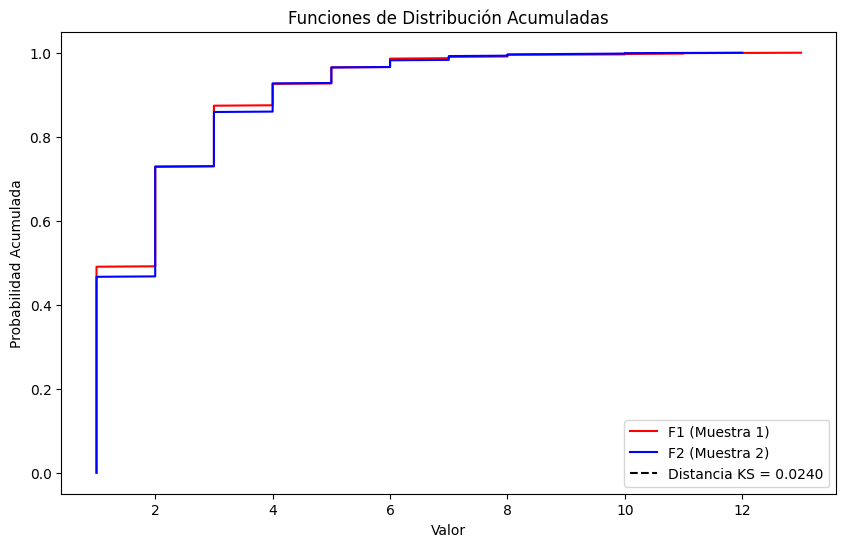

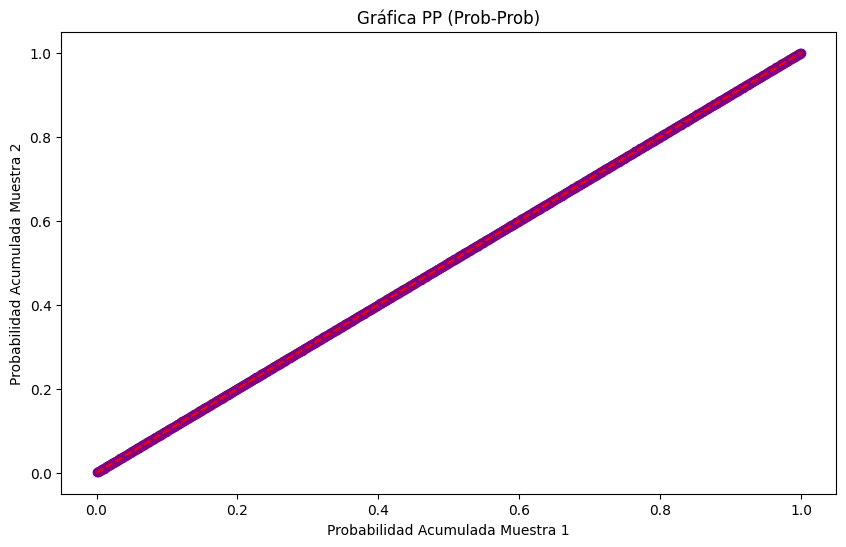

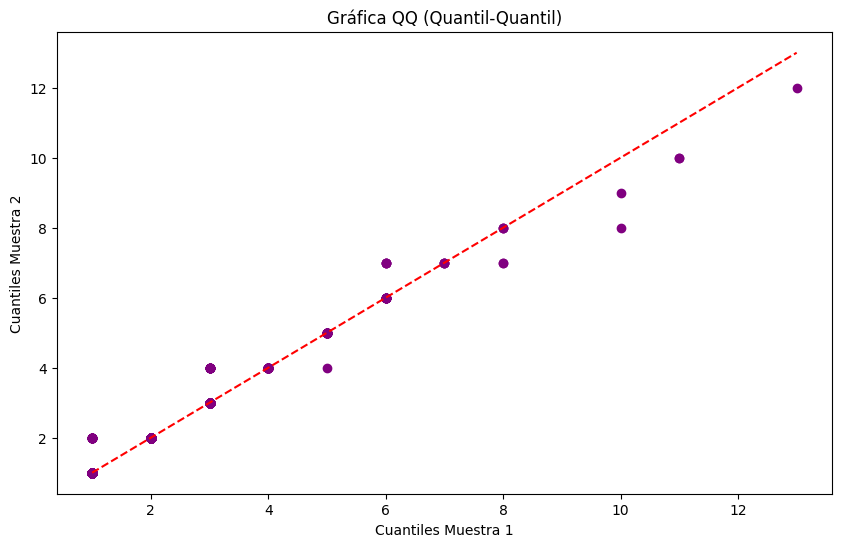

Estadística de KS: 0.0240
P-value de KS: 0.9358
Comparación con Geom(q):


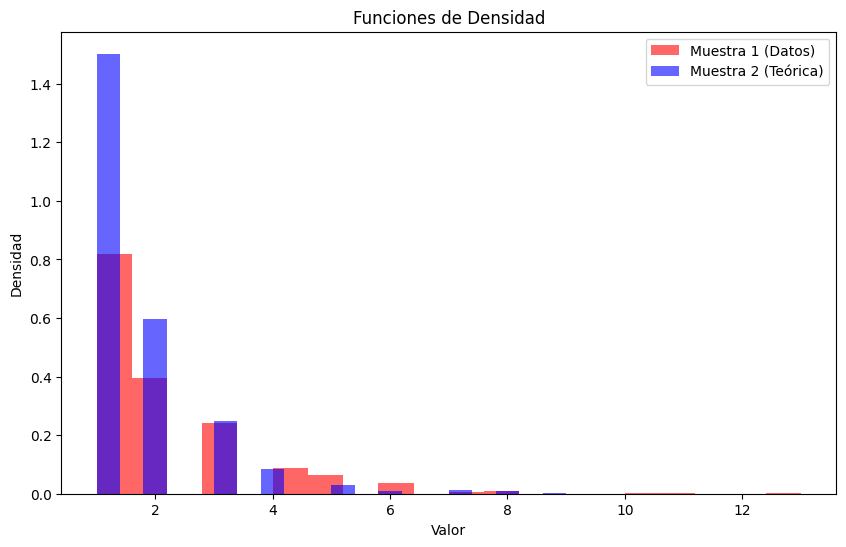

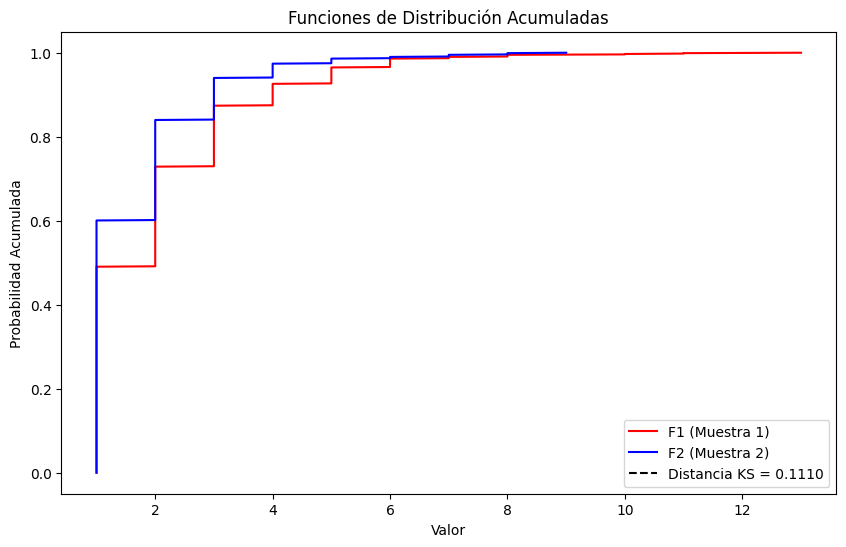

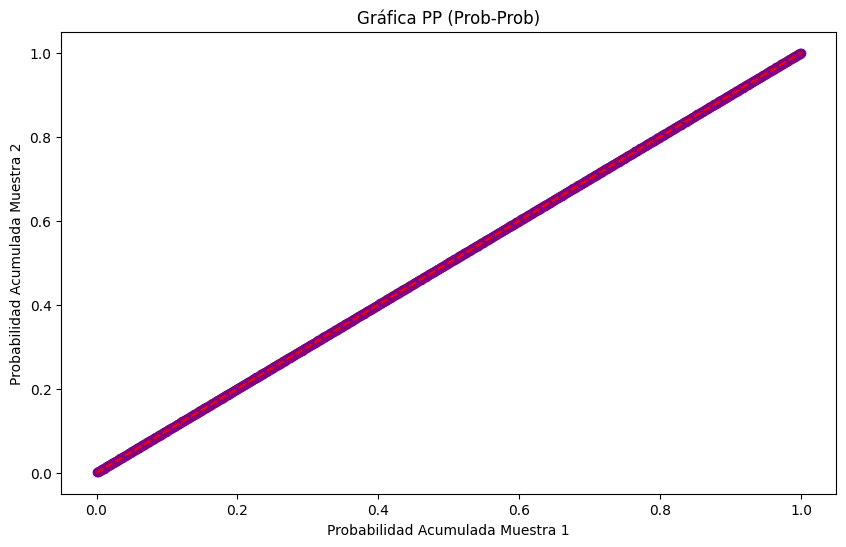

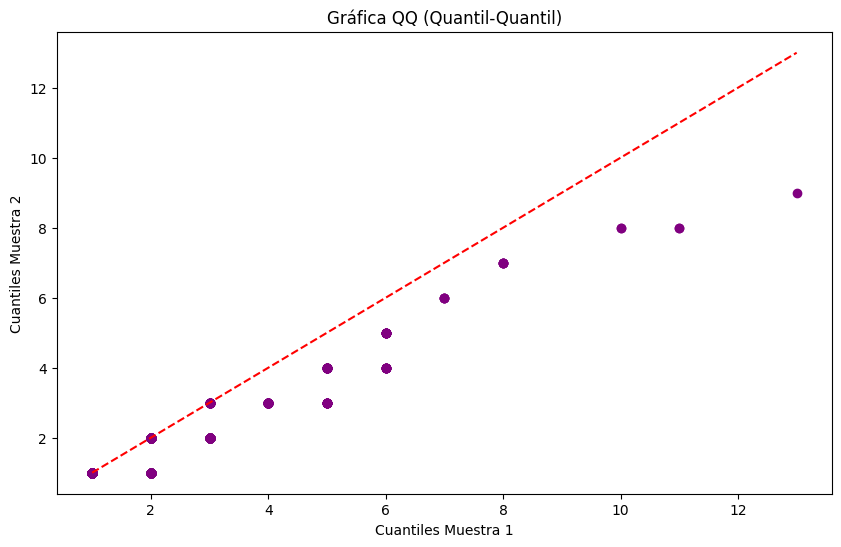

Estadística de KS: 0.1110
P-value de KS: 0.0000


(0.111, 8.74452446093763e-06)

In [36]:
def comparar_muestras(muestra1, muestra2):

    # muestras
    muestra1_sorted = np.sort(muestra1)
    muestra2_sorted = np.sort(muestra2)

    # Histograma de densidad
    plt.figure(figsize=(10, 6))
    plt.hist(muestra1, bins=20, density=True, alpha=0.6, color='r', label="Muestra 1 (Datos)")
    plt.hist(muestra2, bins=20, density=True, alpha=0.6, color='b', label="Muestra 2 (Teórica)")
    plt.title("Funciones de Densidad")
    plt.xlabel("Valor")
    plt.ylabel("Densidad")
    plt.legend()
    plt.show()

    # Funciones de distribución acumulada (CDFs)
    plt.figure(figsize=(10, 6))
    f1 = np.arange(1, len(muestra1_sorted) + 1) / len(muestra1_sorted)
    f2 = np.arange(1, len(muestra2_sorted) + 1) / len(muestra2_sorted)

    plt.plot(muestra1_sorted, f1, color='r', label="F1 (Muestra 1)")
    plt.plot(muestra2_sorted, f2, color='b', label="F2 (Muestra 2)")

    # Distancia KS
    ks_statistic, p_value = ks_2samp(muestra1, muestra2)
    ks_x = muestra1_sorted[np.argmax(np.abs(f1 - f2))]
    ks_y1 = f1[np.argmax(np.abs(f1 - f2))]
    ks_y2 = f2[np.argmax(np.abs(f1 - f2))]

    plt.vlines(ks_x, ks_y1, ks_y2, color='black', linestyle="dashed", label=f"Distancia KS = {ks_statistic:.4f}")
    plt.title("Funciones de Distribución Acumuladas")
    plt.xlabel("Valor")
    plt.ylabel("Probabilidad Acumulada")
    plt.legend()
    plt.show()

    # Gráfica PP (Prob-Prob)
    plt.figure(figsize=(10, 6))
    plt.scatter(f1, f2, color='purple')
    plt.plot([0, 1], [0, 1], 'r--')  # Línea de referencia y = x
    plt.title("Gráfica PP (Prob-Prob)")
    plt.xlabel("Probabilidad Acumulada Muestra 1")
    plt.ylabel("Probabilidad Acumulada Muestra 2")
    plt.show()

    # Gráfica QQ (Quantil-Quantil)
    percentiles = np.linspace(0, 100, len(muestra1_sorted))
    plt.figure(figsize=(10, 6))
    plt.scatter(np.percentile(muestra1_sorted, percentiles), np.percentile(muestra2_sorted, percentiles), color='purple')
    plt.plot([muestra1_sorted[0], muestra1_sorted[-1]], [muestra1_sorted[0], muestra1_sorted[-1]], 'r--')  
    plt.title("Gráfica QQ (Quantil-Quantil)")
    plt.xlabel("Cuantiles Muestra 1")
    plt.ylabel("Cuantiles Muestra 2")
    plt.show()

    # Prueba de Kolmogorov-Smirnov
    print(f"Estadística de KS: {ks_statistic:.4f}")
    print(f"P-value de KS: {p_value:.4f}")

    return ks_statistic, p_value

# Parámetros
p = 0.5
q = min(1.2 * p, 0.99)  # Aseguramos que q < 1
N = 1000

# Generación de muestras
muestra_experimental = np.random.geometric(p, size=N)  # Simulación de lanzamientos reales
muestra_teorica_p = geom.rvs(p, size=N)  # Distribución teórica con p
muestra_teorica_q = geom.rvs(q, size=N)  # Distribución teórica con q = 1.2*p

# Comparación con distribución Geom(p)
print("Comparación con Geom(p):")
comparar_muestras(muestra_experimental, muestra_teorica_p)

# Comparación con distribución Geom(q)
print("Comparación con Geom(q):")
comparar_muestras(muestra_experimental, muestra_teorica_q)


#### Ejercicio 3

In [7]:
areas = pd.read_csv("areas.csv", sep=";")
areas.count()

Country                      223
Area in square miles         223
Area in square kilometres    223
Total area rank              223
dtype: int64

Para dígitos en kilómetros cuadrados


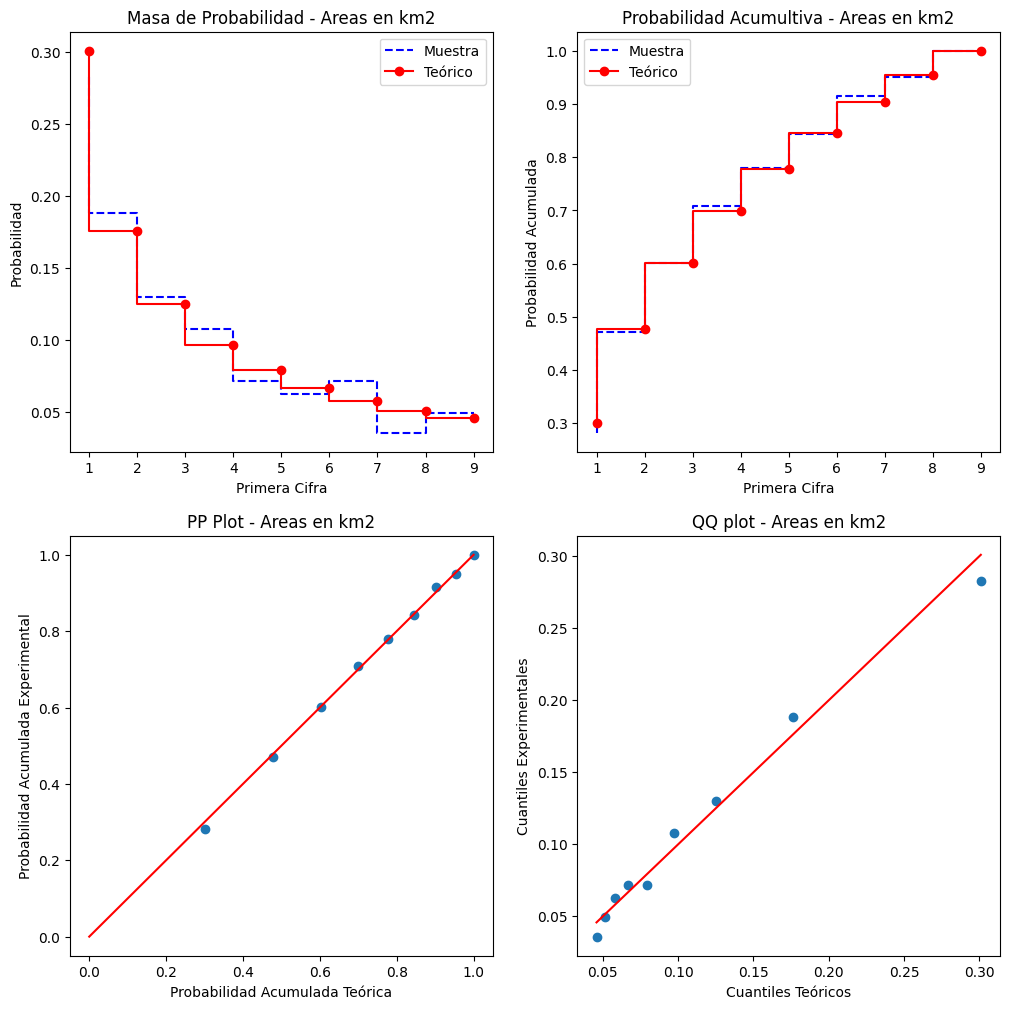

In [8]:
# Análisis comparativo de datos (masa, p-acumulada, pp y qq)
print('Para dígitos en kilómetros cuadrados')
km_digit = areas['Area in square kilometres']
analisis.ej3_plots('Areas en km2',km_digit)

Para dígitos en Millas cuadradas


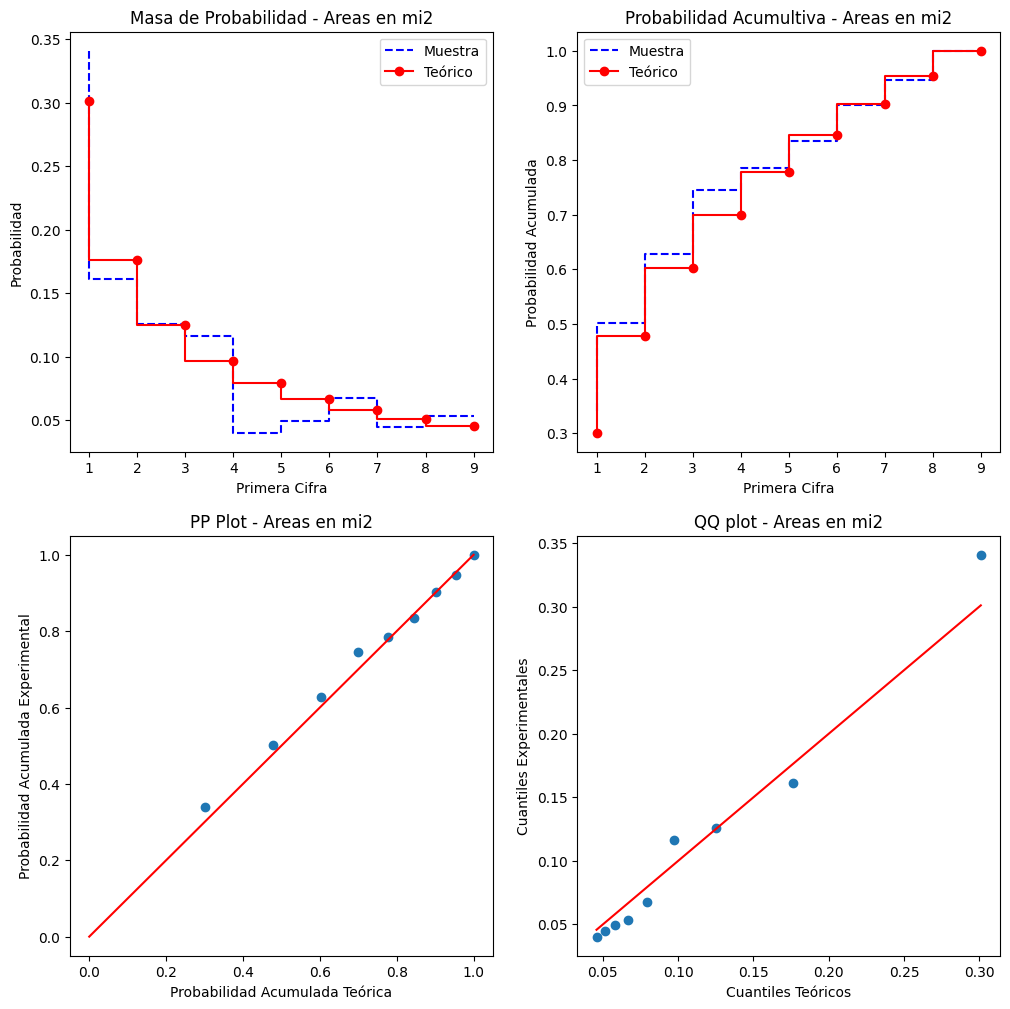

In [9]:
print('Para dígitos en Millas cuadradas')
mi_digit = areas['Area in square miles']
analisis.ej3_plots('Areas en mi2',mi_digit)

In [10]:
analisis.ej3_ks('Areas en km2',km_digit)

 -  Areas en km2
Prueba Kolmogorov-Smirnov
K-S: 0.3010
P: 0.0000000000

Prueba Chi Cuadrado
Chi Cuadrado: 2.7756
P: 0.9476


In [11]:

analisis.ej3_ks('Areas en mi2',mi_digit)

 -  Areas en mi2
Prueba Kolmogorov-Smirnov
K-S: 0.3010
P: 0.0000000000

Prueba Chi Cuadrado
Chi Cuadrado: 8.4354
P: 0.3921


## Ejercicio 5

In [14]:
weather_df = pd.read_csv("weather.csv", sep=",")
# Separar las temperaturas de las estaciones
stations = weather_df["station"]
temperature_data = weather_df.drop(columns=["station"])
# Estandarizar los datos
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(temperature_data)
# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(temperature_scaled)
# Crear un DataFrame con los dos primeros componentes principales
pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pca_df["station"] = stations
# Mostrar las primeras filas del DataFrame resultante
pca_df.head()

,PC1,PC2,station
0,1.089967,-1.842810,St. John’s
1,1.845975,-0.353331,Charlottetown
2,2.193707,-0.445748,Halifax
3,1.882861,-0.915782,Sydney
4,2.329388,-1.408967,Yarmouth


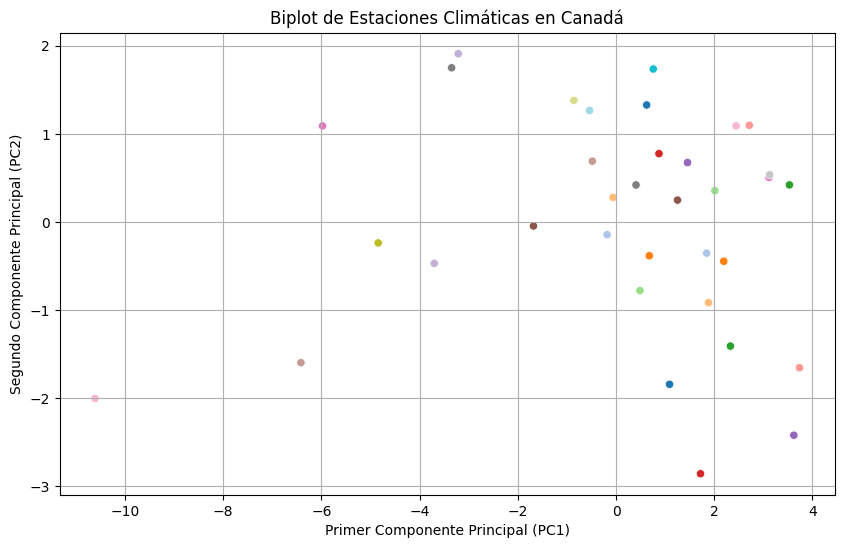

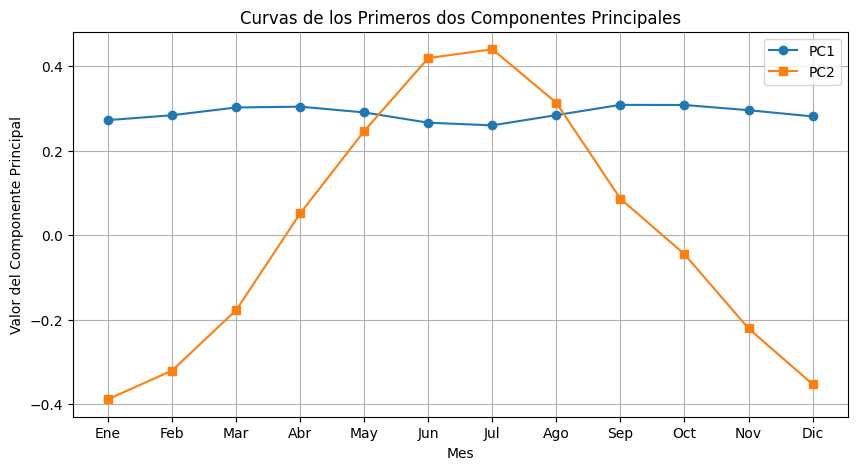

In [ ]:
# Separar las temperaturas de las estaciones
stations = weather_df["station"]
temperature_data = weather_df.drop(columns=["station"])

# Estandarizar los datos
scaler = StandardScaler()
temperature_scaled = scaler.fit_transform(temperature_data)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(temperature_scaled)

# Crear un DataFrame con los dos primeros componentes principales
pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
pca_df["station"] = stations

# Visualizar el biplot de estaciones con nombres y líneas
plt.figure(figsize=(12, 8))
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["station"], palette="tab20", legend=False)

# Agregar nombres de estaciones
for i, row in pca_df.iterrows():
    plt.text(row["PC1"], row["PC2"], row["station"], fontsize=8, alpha=0.7)

plt.xlabel("Primer Componente Principal (PC1)")
plt.ylabel("Segundo Componente Principal (PC2)")
plt.title("Biplot de Estaciones Climáticas en Canadá con Etiquetas")
plt.grid(True)
plt.show()

# Obtener los primeros dos componentes principales
pc1 = pca.components_[0]
pc2 = pca.components_[1]

# Crear la gráfica de los componentes principales como curvas
plt.figure(figsize=(10, 5))
plt.plot(range(1, 13), pc1, marker="o", label="PC1")
plt.plot(range(1, 13), pc2, marker="s", label="PC2")
plt.xlabel("Mes")
plt.ylabel("Valor del Componente Principal")
plt.title("Curvas de los Primeros dos Componentes Principales")
plt.xticks(range(1, 13), ["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
plt.legend()
plt.grid(True)
plt.show()

## Ejercicio #6

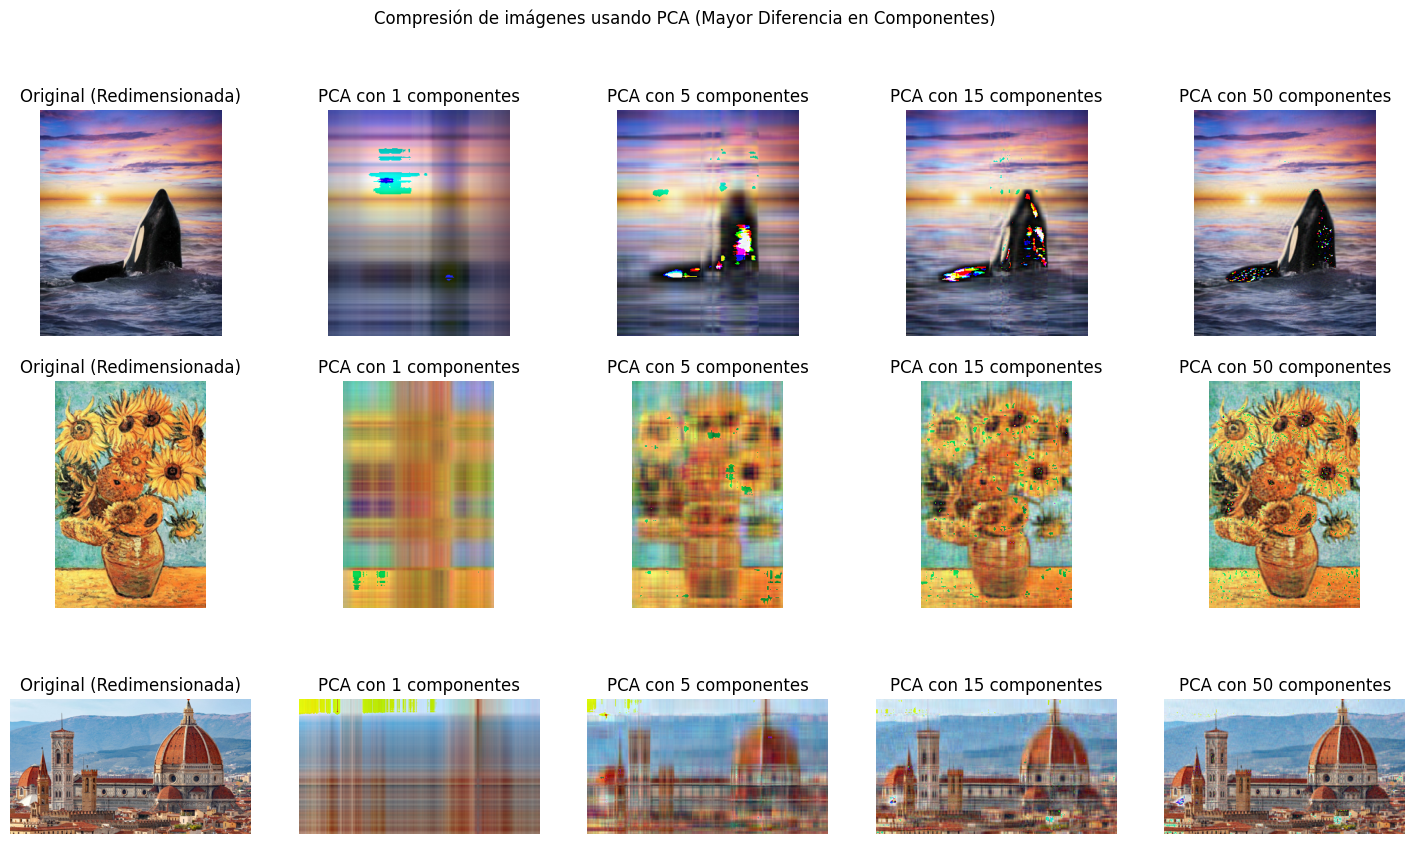

In [32]:
# Función para aplicar PCA y reconstruir la imagen con un número reducido de componentes principales
def compress_image_pca(image_array, num_components):
    compressed_channels = []
    for i in range(image_array.shape[2]):  # Iterar sobre los canales (RGB)
        channel = image_array[:, :, i]
        mean = np.mean(channel, axis=0)
        channel_centered = channel - mean

        pca = PCA(n_components=num_components)
        transformed = pca.fit_transform(channel_centered)
        reconstructed = pca.inverse_transform(transformed) + mean

        compressed_channels.append(reconstructed)

    return np.stack(compressed_channels, axis=2).astype(np.uint8)

# Función para cargar imágenes con PIL y convertirlas a array
def load_image(image_path, resize_factor=0.3):
    img = Image.open(image_path)
    img = img.resize((int(img.width * resize_factor), int(img.height * resize_factor)))
    return np.array(img)

# Cargar imágenes
image_paths = ["img1.jpg", "img2.jpg", "img3.jpg"]
images = [load_image(img_path) for img_path in image_paths]

# Aplicar PCA en diferentes niveles de compresión
compressed_images = {k: [] for k in [1, 5, 15, 50]}
for k in [1, 5, 15, 50]:
    for img in images:
        compressed_images[k].append(compress_image_pca(img, k))

# Mostrar resultados optimizados
fig, axes = plt.subplots(len(images), 5, figsize=(18, 10))

for i, img in enumerate(images):
    axes[i, 0].imshow(img)
    axes[i, 0].set_title("Original (Redimensionada)")
    axes[i, 0].axis("off")

    for j, k in enumerate([1, 5, 15, 50]):
        axes[i, j + 1].imshow(compressed_images[k][i])
        axes[i, j + 1].set_title(f"PCA con {k} componentes")
        axes[i, j + 1].axis("off")

plt.suptitle("Compresión de imágenes usando PCA (Mayor Diferencia en Componentes)")
plt.show()